

# AMLS Assignment Draft
## Task A_2: CNN Tuning on BreastMNIST Dataset

Explore CNN based classifiers on the BreastMNIST dataset.

## Import libraries
The required libraries for this notebook include numpy, matplotlib, tensorflow, medmnist and also a custom built dataload and utility library.

In [26]:
## first enable autoreload during development so latest (new) version local code library is reloaded on execution 
## can be commented out when local code development not happening to avoid overhead
%load_ext autoreload
%autoreload 2

## import libraries
import io
import numpy as np
import matplotlib.pyplot as plt
## import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

## removed MedMNIST as only used in AMLS common library

## local code library
import AMLS_common as ac

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set base parameters
Including hyperparameters and environment specifics

In [27]:
## Initialize parameters
parameter = ac.HyperParameters(learning_rate=0.01, 
                               batch_size=128, 
                               num_epochs=40, 
                               num_filter=32,
                               dropout_rate=0.1,
                               optimise="Adam",
                               loss="binary_crossentropy",
                               layers=2,
                               strides=1,
                               padding="same",
                               default_activation="relu")


pad = "same"

In [28]:
# environment and control (e.g. verbose) parameters
filebase   = "metrics/"          ## where to store file outputs
verbose    = 1                   ## if value equals 1 then print additional process information in steps below

## Load and preprocess the BreastMNIST Data
We load the dataset.

In [29]:
## Loading the data file using custom MedMINST loader
data_flag  = 'breastmnist'       ## defines which dataset to load
result_set = ac.medMNIST_load(data_flag,parameter.batch_size)

## check that the loader returned data correctly and then split out
if result_set != []:
    train_dataset = result_set[0]
    test_dataset  = result_set[1]
    val_dataset   = result_set[2]

if verbose == 1:
    ## print out information on training dataset if verbose set
    print("\nSummary metrics for train_dataset")
    print("type:",type(train_dataset))
    print("length:",len(train_dataset))
    print("shape:",train_dataset)

Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz

Summary metrics for train_dataset
type: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
length: 5
shape: <BatchDataset shapes: ((None, 28, 28, 1), (None, 1)), types: (tf.float64, tf.float32)>


## Define the CNN model

In [30]:
# Define the model
if verbose == 1:
    print("Default activation is ",parameter.default_activation)

model = Sequential([
    Conv2D(parameter.num_filter*4, (3, 3), padding=pad,
           activation=parameter.default_activation, input_shape=(28, 28, 1)),     ## Input larger makes it more consistent
    Conv2D(parameter.num_filter*2, (3, 3), padding=pad,
           activation=parameter.default_activation),                              ## Convolution layer 
    MaxPooling2D((2, 2),strides=parameter.strides),                               ## Pooling layer
    Conv2D(parameter.num_filter, (3, 3), padding=pad,
           activation=parameter.default_activation),                              ## Convolution layer
    Conv2D(parameter.num_filter, (3, 3), padding=pad,
           activation=parameter.default_activation),                              ## Convolution layer
    MaxPooling2D((2, 2),strides=parameter.strides),                               ## Pooling layer
    Conv2D(parameter.num_filter*2, (3, 3), padding=pad,
           activation=parameter.default_activation),                              ## Convolution layer
    MaxPooling2D((2, 2),strides=parameter.strides),                               ## Pooling layer
    Flatten(),  
    Dropout(parameter.dropout_rate),
    Dense(parameter.num_filter*4, activation=parameter.default_activation),       ## Fully connected layer#
    Dense(1, activation='sigmoid')                                                ## Output binary classification  
])

if verbose == 1:
    print(model.summary())
# Redirect the summary output to a string
summary_string  = io.StringIO()
model.summary(print_fn=lambda x: summary_string.write(x + "\n"))
summary_content = summary_string.getvalue()
summary_string.close()

Default activation is  relu
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 32)        18464     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)        

## Fit the model

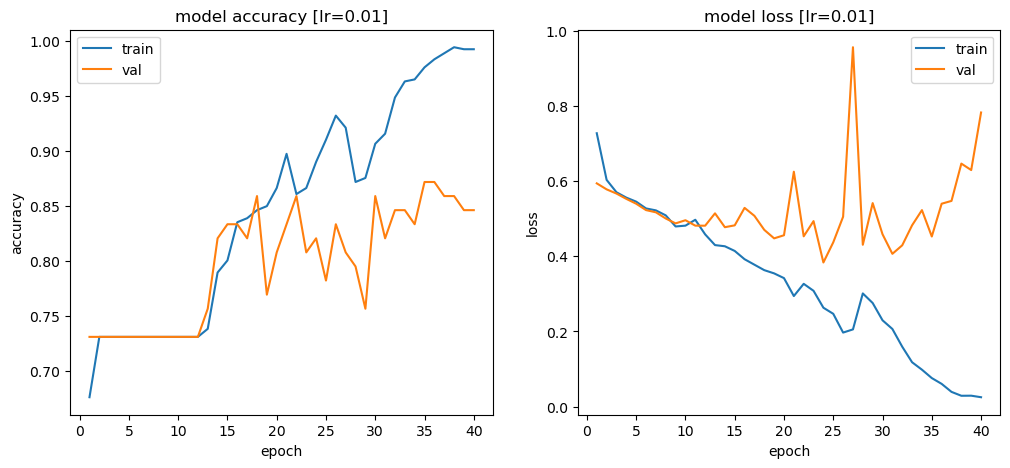

for model
 Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 27, 27, 32)        18464     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26,

['metrics/metrics_2024_12_29_at_133541.xlsx',
 'metrics/summary_2024_12_29_at_133541.txt',
 RunResult(min_loss=0.02485278993844986, max_acc=0.9945054650306702, last_loss=0.02485278993844986, last_acc=0.9926739931106567, var_loss=0.03380382846077548, var_acc=0.0098662142105446),
 HyperParameters(learning_rate=0.01, batch_size=128, num_epochs=40, optimise='Adam', loss='binary_crossentropy', num_filter=32, strides=1, padding='same', dropout_rate=0.1, layers=2, default_activation='relu')]

In [31]:
## set up optimizer from hyperparameter structure
model.compile(optimizer=parameter.optimise,                                                   
              loss=parameter.loss,
              metrics='acc')

## Fit the model
history = model.fit(train_dataset, 
                    validation_data=val_dataset, 
                    epochs=parameter.num_epochs, 
                    batch_size=parameter.batch_size, 
                    verbose=0)

## output graphically and also save to files
ac.graph_and_save(history,summary_content,parameter,filebase)